In [46]:
import subprocess
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from Bio import SeqIO
from Bio import AlignIO
from Bio import motifs
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio.Align import AlignInfo
import igraph
import textdistance

In [4]:
myfile = "final/SP-CB21-Bu_S176_L001.assembled-AGCTAGCT-IGH_HUMAN-all_info.csv"
df = pd.read_csv(myfile, sep="\t", na_values=['None', ''])

In [5]:
df.head()

,acc,beforeMID,MID,afterMID,readingframe,cdr3pep,cdr3nuc,cdr3_qual_min,cdr3_qual_max,cdr3_qual_avg,...,V_main,acc:1,nr_v_mains,nr_v_subs,nr_v_alleles,nr_j_subs,nr_j_alleles,acc:2,readingframe:1,nr_sites
0,M02984:396:000000000-BRKRC:1:1101:10034:6768,CTTCTTTAG,AGCTAGCT,CTTAC,4,CARARKYYYDSSGYYPYLDSWGQGTLVT,TGTGCGAGAGCCAGAAAGTATTACTATGATAGTAGCGGTTATTACC...,30,40,39.2,...,IGHV4,M02984:396:000000000-BRKRC:1:1101:10034:6768,1,1,1,1,1,M02984:396:000000000-BRKRC:1:1101:10034:6768,4.0,1.0
1,M02984:396:000000000-BRKRC:1:1101:10049:7334,TGTGTTTTT,AGCTAGCT,CTTAC,4,CARDNSGSYGGLWGQGTLVT,TGTGCGAGAGATAATAGCGGGAGCTACGGGGGACTGTGGGGCCAGG...,33,40,39.7,...,IGHV4,M02984:396:000000000-BRKRC:1:1101:10049:7334,1,1,1,1,1,NaN,NaN,NaN
2,M02984:396:000000000-BRKRC:1:1101:10095:9536,GATGCGGTA,AGCTAGCT,CTTAC,4,CARAGGYWGQGTLVT,TGTGCGAGAGCAGGCGGCTACTGGGGCCAGGGAACCCTGGTCACC,38,40,39.9,...,IGHV4,M02984:396:000000000-BRKRC:1:1101:10095:9536,1,1,1,1,1,NaN,NaN,NaN
3,M02984:396:000000000-BRKRC:1:1101:10097:18678,GGCTTCTCC,AGCTAGCT,CTTAC,4,CARVGDGYSAGMKYWGQRTLVT,TGTGCAAGGGTCGGAGATGGATACAGCGCTGGAATGAAATACTGGG...,38,40,40.0,...,IGHV3,M02984:396:000000000-BRKRC:1:1101:10097:18678,1,1,1,1,1,NaN,NaN,NaN
4,M02984:396:000000000-BRKRC:1:1101:10113:3277,TTGCGTTTA,AGCTAGCT,CTTAC,4,CATSIAARYYYGMDVWGQGTTVT,TGTGCGACTAGTATAGCAGCTCGCTACTACTACGGTATGGACGTCT...,38,40,39.7,...,IGHV4,M02984:396:000000000-BRKRC:1:1101:10113:3277,1,1,1,1,1,NaN,NaN,NaN


In [6]:
df.columns

Index(['acc', 'beforeMID', 'MID', 'afterMID', 'readingframe', 'cdr3pep',
       'cdr3nuc', 'cdr3_qual_min', 'cdr3_qual_max', 'cdr3_qual_avg',
       'cdr3_qual', 'nt_start', 'nt_end', 'seq_length', 'V_flag', 'V_gene',
       'J_flag', 'J_gene', 'readingframe_seq', 'seq', 'pep', 'qual', 'V_sub',
       'J_sub', 'V_main', 'acc:1', 'nr_v_mains', 'nr_v_subs', 'nr_v_alleles',
       'nr_j_subs', 'nr_j_alleles', 'acc:2', 'readingframe:1', 'nr_sites'],
      dtype='object')

In [7]:
# nr of unique accessions in dataset
df['acc'].nunique()

47313

In [8]:
# nr of unique UMIs in entire dataset
df['beforeMID'].nunique()

33894

# Check nr of unique CDR3's per UMI (should be 1)

In [9]:
cols = ['beforeMID', 'cdr3pep', 'acc']
agg_cdr3 = df[cols].groupby(['beforeMID']).agg('nunique')
agg_cdr3 = agg_cdr3.sort_values(by='cdr3pep', ascending=False)
agg_cdr3.head(20)

,beforeMID,cdr3pep,acc
beforeMID,,,
TTTTTTTTT,1,12,13
TTTTAGTTT,1,10,10
TTTTTTTGT,1,9,9
TTTTGTTTT,1,9,10
ATTCATTTT,1,8,9
GTGCAGTTT,1,8,9
TTGTTGGTG,1,8,9
TTTCTGTTT,1,8,9
ATTTATTTT,1,8,8


In [10]:
df.loc[df['beforeMID'] == 'TTTTTTTTT'].sort_values(by='cdr3pep')

,acc,beforeMID,MID,afterMID,readingframe,cdr3pep,cdr3nuc,cdr3_qual_min,cdr3_qual_max,cdr3_qual_avg,...,V_main,acc:1,nr_v_mains,nr_v_subs,nr_v_alleles,nr_j_subs,nr_j_alleles,acc:2,readingframe:1,nr_sites
47885,M02984:396:000000000-BRKRC:1:2119:9750:5628,TTTTTTTTT,AGCTAGCT,CTTAC,4,CAKLSGTIGDIAAAAEHYFDYWGQGTLVT,TGTGCGAAGTTGAGTGGGACAATTGGCGATATAGCAGCAGCTGCCG...,18,40,38.9,...,IGHV3,M02984:396:000000000-BRKRC:1:2119:9750:5628,1,1,1,1,1,NaN,NaN,NaN
28670,M02984:396:000000000-BRKRC:1:2104:15596:10514,TTTTTTTTT,AGCTAGCT,CTTAC,4,CARDAMRDAFDIWGQGTMVT,TGTGCGAGAGATGCAATGCGAGATGCTTTTGATATCTGGGGCCAAG...,30,40,39.8,...,IGHV1,M02984:396:000000000-BRKRC:1:2104:15596:10514,1,1,1,1,1,NaN,NaN,NaN
28402,M02984:396:000000000-BRKRC:1:2104:10194:4621,TTTTTTTTT,AGCTAGCT,CTTAC,4,CARDLSRGNYLFLGDFWGQGTLVT,TGTGCGAGAGATCTGTCCCGGGGGAACTACTTGTTTTTGGGGGACT...,27,40,39.3,...,IGHV3,M02984:396:000000000-BRKRC:1:2104:10194:4621,1,1,1,1,1,NaN,NaN,NaN
3608,M02984:396:000000000-BRKRC:1:1103:26430:15172,TTTTTTTTT,AGCTAGCT,CTTAC,4,CARLGSSSSRNFDYWGQGTLVT,TGTGCGAGACTGGGTAGCAGCTCGTCGCGGAACTTTGACTACTGGG...,36,40,39.9,...,IGHV5,M02984:396:000000000-BRKRC:1:1103:26430:15172,1,1,1,1,1,NaN,NaN,NaN
22740,M02984:396:000000000-BRKRC:1:1118:20308:15804,TTTTTTTTT,AGCTAGCT,CTTAC,4,CARLYSSGWFDYWGQGTLVT,TGTGCGAGGTTATATAGCAGTGGCTGGTTTGACTACTGGGGCCAGG...,27,40,39.5,...,IGHV4,M02984:396:000000000-BRKRC:1:1118:20308:15804,1,1,1,1,1,NaN,NaN,NaN
21750,M02984:396:000000000-BRKRC:1:1117:25831:22473,TTTTTTTTT,AGCTAGCT,CTTAC,4,CARVFLTGDPQRYFDYWGQGTLVT,TGTGCGAGAGTTTTTCTAACTGGGGATCCCCAGAGGTACTTTGACT...,24,40,38.9,...,IGHV4,M02984:396:000000000-BRKRC:1:1117:25831:22473,1,1,1,1,1,NaN,NaN,NaN
38643,M02984:396:000000000-BRKRC:1:2112:19726:20858,TTTTTTTTT,AGCTAGCT,CTTAC,4,CARVGVRGVIIDYWGQGTLVT,TGTGCGAGAGTAGGAGTTCGGGGAGTTATTATTGACTACTGGGGCC...,38,40,39.8,...,IGHV4,M02984:396:000000000-BRKRC:1:2112:19726:20858,1,1,1,1,1,NaN,NaN,NaN
14930,M02984:396:000000000-BRKRC:1:1112:19062:7291,TTTTTTTTT,AGCTAGCT,CTTAC,4,CARVLTGELDYWGQGTLVT,TGTGCGAGAGTCCTAACTGGGGAGCTTGACTACTGGGGCCAGGGAA...,37,40,39.7,...,IGHV3,M02984:396:000000000-BRKRC:1:1112:19062:7291,1,1,1,1,1,NaN,NaN,NaN
2626,M02984:396:000000000-BRKRC:1:1102:9347:11477,TTTTTTTTT,AGCTAGCT,CTTAC,4,CARVPASRPGTGTRYYGMDVWGQGTTVT,TGTGCGAGAGTCCCCGCCTCGCGGCCGGGGACCGGGACACGCTACT...,11,40,38.6,...,IGHV3,M02984:396:000000000-BRKRC:1:1102:9347:11477,1,1,1,1,1,NaN,NaN,NaN
28272,M02984:396:000000000-BRKRC:1:2103:7590:12892,TTTTTTTTT,AGCTAGCT,CTTAC,4,CTPRGSFDYWGQGTLVT,TGTACCCCCCGTGGGAGCTTTGACTACTGGGGCCAGGGAACCCTGG...,38,40,39.9,...,IGHV3,M02984:396:000000000-BRKRC:1:2103:7590:12892,1,1,1,1,1,NaN,NaN,NaN


(array([3.2278e+04, 1.1580e+03, 3.1300e+02, 8.0000e+01, 4.0000e+01,
        1.6000e+01, 5.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

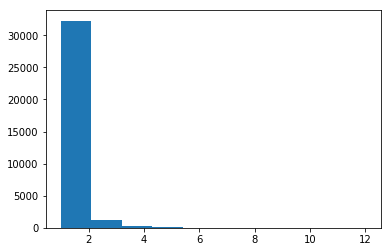

In [11]:
plt.hist(agg_cdr3['cdr3pep'])

In [12]:
cols = ['beforeMID', 'cdr3pep', 'acc']
hist_agg_cdr3 = agg_cdr3[cols].groupby(['cdr3pep']).agg(len)
hist_agg_cdr3['cumulative'] = hist_agg_cdr3['beforeMID'].cumsum()
hist_agg_cdr3['percentage'] = 100*hist_agg_cdr3['beforeMID']/hist_agg_cdr3['beforeMID'].sum()
hist_agg_cdr3

,beforeMID,acc,cumulative,percentage
cdr3pep,,,,
1,27020,27020,27020,79.719124
2,5258,5258,32278,15.513070
3,1158,1158,33436,3.416534
4,313,313,33749,0.923467
5,80,80,33829,0.236030
6,40,40,33869,0.118015
7,16,16,33885,0.047206
8,5,5,33890,0.014752
9,2,2,33892,0.005901


## Check UMI sequences per CDR3

In [13]:
cols = ['beforeMID', 'cdr3pep', 'acc']
agg_umi_per_cdr3 = df[cols].groupby(['cdr3pep']).agg('nunique')
agg_umi_per_cdr3 = agg_umi_per_cdr3.sort_values(by='beforeMID', ascending=False)
agg_umi_per_cdr3.head()

,beforeMID,cdr3pep,acc
cdr3pep,,,
CARDQQLVWGLFDYWGQGTLVT,314,1,354
CAHRGSSSSGLDYWGQGTLVT,313,1,367
CARASGRQQLGNWFDPWGQGTQVT,283,1,313
CARARKYYYDSSGYYPYLDSWGQGTLVT,257,1,280
CARVGPGPYYFDYWGQGTLVT,254,1,285


In [14]:
df.loc[df['cdr3pep'] == 'CARDQQLVWGLFDYWGQGTLVT'].sort_values(by='beforeMID')

,acc,beforeMID,MID,afterMID,readingframe,cdr3pep,cdr3nuc,cdr3_qual_min,cdr3_qual_max,cdr3_qual_avg,...,V_main,acc:1,nr_v_mains,nr_v_subs,nr_v_alleles,nr_j_subs,nr_j_alleles,acc:2,readingframe:1,nr_sites
24444,M02984:396:000000000-BRKRC:1:1119:28144:18979,AAAATTCTT,AGCTAGCT,CTTAC,4,CARDQQLVWGLFDYWGQGTLVT,TGTGCGAGAGATCAGCAGCTCGTGTGGGGTCTCTTTGACTACTGGG...,40,40,40.0,...,IGHV3,M02984:396:000000000-BRKRC:1:1119:28144:18979,1,1,1,1,1,NaN,NaN,NaN
25279,M02984:396:000000000-BRKRC:1:2101:20847:20069,AAACAAGTC,AGCTAGCT,CTTAC,4,CARDQQLVWGLFDYWGQGTLVT,TGTGCGAGAGATCAGCAGCTCGTGTGGGGTCTCTTTGACTACTGGG...,40,40,40.0,...,IGHV3,M02984:396:000000000-BRKRC:1:2101:20847:20069,1,1,1,1,1,NaN,NaN,NaN
33863,M02984:396:000000000-BRKRC:1:2108:21010:3341,AAACTCTCA,AGCTAGCT,CTTAC,4,CARDQQLVWGLFDYWGQGTLVT,TGTGCGAGAGATCAGCAGCTCGTGTGGGGTCTCTTTGACTACTGGG...,36,40,39.8,...,IGHV3,M02984:396:000000000-BRKRC:1:2108:21010:3341,1,1,1,1,1,NaN,NaN,NaN
20274,M02984:396:000000000-BRKRC:1:1116:22487:21278,AAAGACTAG,AGCTAGCT,CTTAC,4,CARDQQLVWGLFDYWGQGTLVT,TGTGCGAGAGATCAGCAGCTCGTGTGGGGTCTCTTTGACTACTGGG...,38,40,40.0,...,IGHV3,M02984:396:000000000-BRKRC:1:1116:22487:21278,1,1,1,1,1,NaN,NaN,NaN
5415,M02984:396:000000000-BRKRC:1:1105:12408:24384,AAAGGTGCG,AGCTAGCT,CTTAC,4,CARDQQLVWGLFDYWGQGTLVT,TGTGCGAGAGATCAGCAGCTCGTGTGGGGTCTCTTTGACTACTGGG...,36,40,39.6,...,IGHV3,M02984:396:000000000-BRKRC:1:1105:12408:24384,1,1,1,1,1,NaN,NaN,NaN
12872,M02984:396:000000000-BRKRC:1:1110:5482:14781,AACAAACCT,AGCTAGCT,CTTAC,4,CARDQQLVWGLFDYWGQGTLVT,TGTGCGAGAGATCAGCAGCTCGTGTGGGGTCTCTTTGACTACTGGG...,38,40,40.0,...,IGHV3,M02984:396:000000000-BRKRC:1:1110:5482:14781,1,1,1,1,1,NaN,NaN,NaN
11527,M02984:396:000000000-BRKRC:1:1109:4806:8643,AACCGTTCG,AGCTAGCT,CTTAC,4,CARDQQLVWGLFDYWGQGTLVT,TGTGCGAGAGATCAGCAGCTCGTGTGGGGTCTCTTTGACTACTGGG...,37,40,39.9,...,IGHV3,M02984:396:000000000-BRKRC:1:1109:4806:8643,1,1,1,1,1,NaN,NaN,NaN
11265,M02984:396:000000000-BRKRC:1:1109:24065:9643,AACTATTTG,AGCTAGCT,CTTAC,4,CARDQQLVWGLFDYWGQGTLVT,TGTGCGAGAGATCAGCAGCTCGTGTGGGGTCTCTTTGACTACTGGG...,38,40,39.9,...,IGHV3,M02984:396:000000000-BRKRC:1:1109:24065:9643,1,1,1,1,1,NaN,NaN,NaN
635,M02984:396:000000000-BRKRC:1:1101:21316:21058,AACTGAGTA,AGCTAGCT,CTTAC,4,CARDQQLVWGLFDYWGQGTLVT,TGTGCGAGAGATCAGCAGCTCGTGTGGGGTCTCTTTGACTACTGGG...,22,40,39.3,...,IGHV4,M02984:396:000000000-BRKRC:1:1101:21316:21058,1,1,1,1,1,NaN,NaN,NaN
15328,M02984:396:000000000-BRKRC:1:1112:25698:6274,AACTGTAGG,AGCTAGCT,CTTAC,4,CARDQQLVWGLFDYWGQGTLVT,TGTGCGAGAGATCAGCAGCTCGTGTGGGGTCTCTTTGACTACTGGG...,29,40,39.5,...,IGHV3,M02984:396:000000000-BRKRC:1:1112:25698:6274,1,1,1,1,1,NaN,NaN,NaN


## Group by UMI and CDR3pep

In [15]:
cols = ['beforeMID', 'cdr3pep', 'acc']
agg_umi = df[cols].groupby(['beforeMID','cdr3pep']).agg('nunique')

In [16]:
agg_umi = agg_umi.sort_values(by='acc', ascending=False)
agg_umi.head()

,,beforeMID,cdr3pep,acc
beforeMID,cdr3pep,,,
GTGAATTAG,CARTYCSSSNRCYDYWGQGTLVT,1,1,5
GGCTACCAT,CARDYGNGFDYWGQGTLVT,1,1,5
ATTGGCTTT,CARDLETDYYDSSDVFDIWGQGTMVT,1,1,4
CTTCCACGG,CARLLDYGDYRRLLGQGTLVT,1,1,4
CCTACCCTA,CASDIKWNFDSWGQGTLVT,1,1,4


(array([3.926e+04, 0.000e+00, 3.472e+03, 0.000e+00, 0.000e+00, 3.410e+02,
        0.000e+00, 1.900e+01, 0.000e+00, 2.000e+00]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

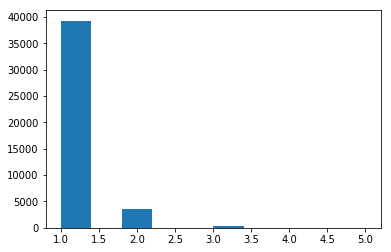

In [17]:
plt.hist(agg_umi['acc'])

In [18]:
100*len(agg_umi.loc[agg_umi['acc'] > 1])/agg_umi['acc'].sum() # max percentage of reads that we can correct

8.10348107285524

In [19]:
cols = ['acc', 'seq', 'qual']
check = df.loc[(df['beforeMID']=='GTGAATTAG') & (df['cdr3pep']=='CARTYCSSSNRCYDYWGQGTLVT')][cols]

In [20]:
check

,acc,seq,qual
25639,M02984:396:000000000-BRKRC:1:2101:28441:10076,ATCTAGCTAGCTCGTATCGCCTCCCTCGCGCCAGTGAATTAGCTTA...,34 34 34 34 34 38 38 38 38 38 38 38 38 38 38 3...
26643,M02984:396:000000000-BRKRC:1:2102:2307:14244,AAGAAGCTAGCTCGTATCGCCTCCCTCGCGCCAGTGAATTAGCTTA...,34 34 34 34 34 38 38 37 38 38 37 37 38 38 38 3...
27497,M02984:396:000000000-BRKRC:1:2103:15880:18782,ACTCAGCTAGCTCGTATCGCCTCCCTCGCGTCAGTGAATTAGCTTA...,34 34 34 34 34 38 38 38 38 38 38 37 37 38 38 3...
36615,M02984:396:000000000-BRKRC:1:2110:29197:12107,TGGTAGCTAGCTCGTATCGCCTCCCTCGCGCCAGTGAATTAGCTTA...,34 34 34 34 34 37 38 38 38 38 38 38 38 38 38 3...
44577,M02984:396:000000000-BRKRC:1:2117:15208:22531,ACTCAGCTAGCTCGTATCGCCTCCCTCGCGCCAGTGAATTAGCTTA...,34 34 34 34 34 38 38 38 38 38 38 38 38 38 36 3...


In [21]:
sequences = list()
for index, row in check.iterrows():
    sr = SeqRecord(Seq(row['seq']), id=row['acc'])
    sr.letter_annotations["phred_quality"] = [int(i) for i in row['qual'].split()]
    sequences.append(sr)

In [22]:
SeqIO.write(sequences, "example.fastq", "fastq")

5

In [23]:
def multipleSequenceAlignment(fastafile):
    '''
    Description: perform multiple sequence alignment and trim ends to make sequences of same size
    In: fasta file name
    Out: clustal (fasta) file name
    '''
    clustalfile = fastafile + ".clustal.fasta"
    cmd = ["./clustalo", "--force", "-i", fastafile, "-o", clustalfile]
    rc = subprocess.call(cmd)
    if rc != 0:
        sys.exit("something went wrong with: " + " ".join(cmd))
    return(clustalfile)

In [24]:
clustalFile = multipleSequenceAlignment("example.fasta")

In [25]:
clustalFile

'example.fasta.clustal.fasta'

In [26]:
msa = AlignIO.read(clustalFile, "fasta")
summary_align = AlignInfo.SummaryInfo(msa)

In [27]:
consensus = summary_align.dumb_consensus()

In [28]:
my_pssm = summary_align.pos_specific_score_matrix(consensus, chars_to_ignore = ['N'])

In [29]:
print(consensus)

AXXXAGCTAGCTCGTATCGCCTCCCTCGCGCCAGTGAATTAGCTTACCTGAGGAGACGGTGACCAGGGTTCCCTGGCCCCAGTAGTCGTAGCATCTGTTACTACTACTACAATATGTTCTCGCACAGTAATACACAGCCATGTCCTCAGCTCTCAGGCTGCCCATTTGAAGATACAGCGTGTTCTTGGAATTGTCTCTGGAGATGGTGAATCTGCCCTTCACAGAGTTTGCATAATATGTGCTACCCCCATTACTAXTAATAGCTGAXAXATATTCCXGTCCCTTCCCTGGAGCCTGGCGGACCCAGTXCATXXCATAGCTXCTGAAXGTGAAXCCAGAGGCTGCACAGGAGAGT


In [30]:
print(my_pssm)

    A   C   G   T
A  4.0 0.0 0.0 1.0
X  1.0 2.0 1.0 1.0
X  0.0 1.0 2.0 2.0
X  1.0 2.0 0.0 2.0
A  5.0 0.0 0.0 0.0
G  0.0 0.0 5.0 0.0
C  0.0 5.0 0.0 0.0
T  0.0 0.0 0.0 5.0
A  5.0 0.0 0.0 0.0
G  0.0 0.0 5.0 0.0
C  0.0 5.0 0.0 0.0
T  0.0 0.0 0.0 5.0
C  0.0 5.0 0.0 0.0
G  0.0 0.0 5.0 0.0
T  0.0 0.0 0.0 5.0
A  5.0 0.0 0.0 0.0
T  0.0 0.0 0.0 5.0
C  0.0 5.0 0.0 0.0
G  0.0 0.0 5.0 0.0
C  0.0 5.0 0.0 0.0
C  0.0 5.0 0.0 0.0
T  0.0 0.0 0.0 5.0
C  0.0 5.0 0.0 0.0
C  0.0 5.0 0.0 0.0
C  0.0 5.0 0.0 0.0
T  0.0 0.0 0.0 5.0
C  0.0 5.0 0.0 0.0
G  0.0 0.0 5.0 0.0
C  0.0 5.0 0.0 0.0
G  0.0 0.0 5.0 0.0
C  0.0 4.0 0.0 1.0
C  0.0 5.0 0.0 0.0
A  5.0 0.0 0.0 0.0
G  0.0 0.0 5.0 0.0
T  0.0 0.0 0.0 5.0
G  0.0 0.0 5.0 0.0
A  5.0 0.0 0.0 0.0
A  5.0 0.0 0.0 0.0
T  0.0 0.0 0.0 5.0
T  0.0 0.0 0.0 5.0
A  5.0 0.0 0.0 0.0
G  0.0 0.0 5.0 0.0
C  0.0 5.0 0.0 0.0
T  0.0 0.0 0.0 5.0
T  0.0 0.0 0.0 5.0
A  5.0 0.0 0.0 0.0
C  0.0 5.0 0.0 0.0
C  0.0 5.0 0.0 0.0
T  0.0 0.0 0.0 5.0
G  0.0 0.0 5.0 0.0
A  5.0 0.0 0.0 0.0
G  0.0 0.0 5.

## TO DO NEXT: get majority consensus

In [31]:
my_pssm[0]

{'A': 4.0, 'C': 0, 'G': 0, 'T': 1.0}

In [32]:
# Let op!! Doet niks met ties
def getMostFrequentKey(d):
    return sorted(d, key=d.get, reverse=True)[0]

In [33]:
majority_consensus = list(map(getMostFrequentKey, my_pssm))
"".join(majority_consensus)

'ACGCAGCTAGCTCGTATCGCCTCCCTCGCGCCAGTGAATTAGCTTACCTGAGGAGACGGTGACCAGGGTTCCCTGGCCCCAGTAGTCGTAGCATCTGTTACTACTACTACAATATGTTCTCGCACAGTAATACACAGCCATGTCCTCAGCTCTCAGGCTGCCCATTTGAAGATACAGCGTGTTCTTGGAATTGTCTCTGGAGATGGTGAATCTGCCCTTCACAGAGTTTGCATAATATGTGCTACCCCCATTACTAGTAATAGCTGATATATATTCCGGTCCCTTCCCTGGAGCCTGGCGGACCCAGTGCATAGCATAGCTGCTGAACGTGAACCCAGAGGCTGCACAGGAGAGT'

## Try with motifs functions

In [34]:
clustal = list()
for record in SeqIO.parse(clustalFile, "fasta"):
    clustal.append(record.seq)
clustal

[Seq('ATCTAGCTAGCTCGTATCGCCTCCCTCGCGCCAGTGAATTAGCTTACCTGAGGA...AGT', SingleLetterAlphabet()),
 Seq('AAGAAGCTAGCTCGTATCGCCTCCCTCGCGCCAGTGAATTAGCTTACCTGAGGA...AGT', SingleLetterAlphabet()),
 Seq('ACTCAGCTAGCTCGTATCGCCTCCCTCGCGTCAGTGAATTAGCTTACCTGAGGA...AGT', SingleLetterAlphabet()),
 Seq('TGGTAGCTAGCTCGTATCGCCTCCCTCGCGCCAGTGAATTAGCTTACCTGAGGA...AGT', SingleLetterAlphabet()),
 Seq('ACTCAGCTAGCTCGTATCGCCTCCCTCGCGCCAGTGAATTAGCTTACCTGAGGA...AGT', SingleLetterAlphabet())]

In [35]:
m = motifs.create(clustal)

In [36]:
print(m.consensus)

ACGTAGCTAGCTCGTATCGCCTCCCTCGCGCCAGTGAATTAGCTTACCTGAGGAGACGGTGACCAGGGTTCCCTGGCCCCAGTAGTCGTAGCATCTGTTACTACTACTACAATATGTTCTCGCACAGTAATACACAGCCATGTCCTCAGCTCTCAGGCTGCCCATTTGAAGATACAGCGTGTTCTTGGAATTGTCTCTGGAGATGGTGAATCTGCCCTTCACAGAGTTTGCATAATATGTGCTACCCCCATTACTAGTAATAGCTGATATATATTCCGGTCCCTTCCCTGGAGCCTGGCGGACCCAGTGCATAGCATAGCTGCTGAACGTGAACCCAGAGGCTGCACAGGAGAGT


In [37]:
print(m.degenerate_consensus)

ANKYAGCTAGCTCGTATCGCCTCCCTCGCGCCAGTGAATTAGCTTACCTGAGGAGACGGTGACCAGGGTTCCCTGGCCCCAGTAGTCGTAGCATCTGTTACTACTACTACAATATGTTCTCGCACAGTAATACACAGCCATGTCCTCAGCTCTCAGGCTGCCCATTTGAAGATACAGCGTGTTCTTGGAATTGTCTCTGGAGATGGTGAATCTGCCCTTCACAGAGTTTGCATAATATGTGCTACCCCCATTACTASTAATAGCTGATAYATATTCCRGTCCCTTCCCTGGAGCCTGGCGGACCCAGTKCATAKCATAGCTRCTGAACGTGAAYCCAGAGGCTGCACAGGAGAGT


In [38]:
m.weblogo("weblogo.png")

## Pairwise comparison UMIs

In [50]:
uniq_sequences = list(set(df['beforeMID']))
print("nr of unique UMI's:", len(uniq_sequences))
uniq_sequences = uniq_sequences[:10]  # As a test

nr of unique UMI's: 33894


In [58]:
g = igraph.Graph()
g.add_vertices(len(uniq_sequences))
g.vs["name"] = uniq_sequences
g.vs["label"] = uniq_sequences
count_edges = 0
for i in range(len(uniq_sequences)-1):
    for j in range(i+1, len(uniq_sequences)):
        if textdistance.hamming.distance(uniq_sequences[i], uniq_sequences[j]) < 4:
            g.add_edge(uniq_sequences[i], uniq_sequences[j])
            count_edges += 1
            print(count_edges)

1


In [60]:
g.summary()

'IGRAPH UN-- 10 1 -- \n+ attr: label (v), name (v)'